# Data Cleaning

In [55]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [56]:
# Load the dataset
df = pd.read_csv("train.csv")

In [57]:
# Explore the dataset (info, describe, value_counts, EDA)
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)
df.head(10)

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,Core_Count,Clock_Speed_GHz,Performance_Tier,RAM Size GB,Storage Size GB,RAM Tier,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,expensive,85.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,8.0,3.20,Flagship,12.0,256.0,Flagship,4400.0,66,6.62,1080.0,2400.0,120.0,Punch Hole,48.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,iQOO
1,non-expensive,88.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,8.0,2.84,Flagship,8.0,128.0,High-End,4500.0,0,6.50,1080.0,2400.0,120.0,Punch Hole,12.0,3.0,32.0,1.0,Yes,1 TB,Android,v10,Samsung
2,non-expensive,75.0,Yes,Yes,Yes,No,No,No,Snapdragon,4,8.0,2.40,Unknown,4.0,64.0,Mid-Range,5000.0,18,6.58,1080.0,2408.0,120.0,Water Drop Notch,50.0,2.0,8.0,1.0,Yes,1 TB,Android,v12,iQOO
3,non-expensive,74.0,Yes,Yes,No,No,No,Yes,Helio,99,8.0,2.20,Mid-Range,4.0,64.0,Mid-Range,5000.0,18,6.58,1080.0,2400.0,90.0,Water Drop Notch,50.0,3.0,8.0,1.0,Yes,512 GB,Android,v12,Poco
4,non-expensive,80.0,Yes,Yes,No,No,No,No,Snapdragon,680,8.0,2.40,Mid-Range,8.0,128.0,High-End,5000.0,44,6.58,1080.0,2408.0,90.0,Water Drop Notch,50.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,Vivo
5,non-expensive,84.0,Yes,Yes,Yes,No,Yes,Yes,Dimensity,8100,8.0,2.85,Unknown,8.0,128.0,High-End,5080.0,67,6.60,1080.0,2460.0,144.0,Punch Hole,64.0,3.0,16.0,1.0,No,1 TB,Android,v12,POCO
6,non-expensive,84.0,Yes,Yes,Yes,No,No,Yes,Snapdragon,695,8.0,2.20,Mid-Range,8.0,128.0,High-End,5000.0,67,6.67,1080.0,2400.0,120.0,Punch Hole,64.0,3.0,16.0,1.0,Yes,1 TB,Android,v11,Poco
7,non-expensive,78.0,Yes,Yes,Yes,No,No,No,Dimensity,930,8.0,2.20,Unknown,6.0,128.0,Mid-Range,4200.0,66,6.40,1080.0,2400.0,90.0,Punch Hole,50.0,3.0,16.0,1.0,No,1 TB,Android,v12,Realme
8,non-expensive,80.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,695,8.0,2.20,Mid-Range,6.0,128.0,Mid-Range,5000.0,33,6.40,1080.0,2400.0,60.0,Punch Hole,50.0,3.0,16.0,1.0,No,1 TB,Android,v11,Motorola
9,non-expensive,82.0,Yes,Yes,No,No,No,No,Snapdragon,665,8.0,2.40,Unknown,8.0,128.0,High-End,4500.0,18,6.38,1080.0,2340.0,60.0,Water Drop Notch,48.0,1.0,32.0,1.0,Yes,256 GB,Android,v9.0,Vivo


In [58]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    867 non-null    object 
 1   rating                   867 non-null    float64
 2   Dual_Sim                 867 non-null    object 
 3   4G                       867 non-null    object 
 4   5G                       867 non-null    object 
 5   Vo5G                     867 non-null    object 
 6   NFC                      867 non-null    object 
 7   IR_Blaster               867 non-null    object 
 8   Processor_Brand          867 non-null    object 
 9   Processor_Series         867 non-null    object 
 10  Core_Count               867 non-null    float64
 11  Clock_Speed_GHz          867 non-null    float64
 12  Performance_Tier         867 non-null    object 
 13  RAM_Size_GB              867 non-null    float64
 14  Storage_Size_GB          8

In [60]:
df.describe()

,rating,Core_Count,Clock_Speed_GHz,RAM_Size_GB,Storage_Size_GB,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,78.524798,7.760092,2.449642,6.437578,137.671211,4767.459054,34.536332,6.473968,1064.904268,2186.475202,91.304498,49.862745,2.116494,16.349481,0.943483
std,6.826641,0.890091,0.398170,2.759815,108.508655,1120.556019,35.843186,0.655185,311.984946,562.572215,28.201347,31.905762,1.001866,10.278293,0.296692
min,60.000000,2.000000,1.100000,0.000000,0.000000,800.000000,0.000000,1.770000,120.000000,160.000000,60.000000,2.000000,0.000000,1.000000,0.000000
25%,75.000000,8.000000,2.300000,4.000000,64.000000,4500.000000,7.500000,6.500000,1080.000000,1612.000000,60.000000,48.000000,1.000000,8.000000,1.000000
50%,80.000000,8.000000,2.400000,6.000000,128.000000,5000.000000,25.000000,6.580000,1080.000000,2400.000000,90.000000,50.000000,3.000000,16.000000,1.000000
75%,83.500000,8.000000,2.500000,8.000000,128.000000,5000.000000,52.500000,6.670000,1080.000000,2408.000000,120.000000,64.000000,3.000000,16.000000,1.000000
max,89.000000,8.000000,3.220000,18.000000,1024.000000,22000.000000,240.000000,8.030000,2460.000000,3840.000000,165.000000,200.000000,3.000000,60.000000,2.000000


In [61]:
# Remove duplicate rows
df.duplicated().any()

np.True_

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
# Handle missing values (NULLs) and 'Unknown' values
df.isna().sum()

price                      0
rating                     0
Dual_Sim                   0
4G                         0
5G                         0
Vo5G                       0
NFC                        0
IR_Blaster                 0
Processor_Brand            0
Processor_Series           0
Core_Count                 0
Clock_Speed_GHz            0
Performance_Tier           0
RAM_Size_GB                0
Storage_Size_GB            0
RAM_Tier                   0
battery_capacity           0
fast_charging_power        0
Screen_Size                0
Resolution_Width           0
Resolution_Height          0
Refresh_Rate               0
Notch_Type                 0
primary_rear_camera_mp     0
num_rear_cameras           0
primary_front_camera_mp    0
num_front_cameras          0
memory_card_support        0
memory_card_size           0
os_name                    0
os_version                 0
brand                      0
dtype: int64

In [64]:
df.value_counts()

price          rating  Dual_Sim  4G   5G   Vo5G  NFC  IR_Blaster  Processor_Brand  Processor_Series  Core_Count  Clock_Speed_GHz  Performance_Tier  RAM_Size_GB  Storage_Size_GB  RAM_Tier   battery_capacity  fast_charging_power  Screen_Size  Resolution_Width  Resolution_Height  Refresh_Rate  Notch_Type   primary_rear_camera_mp  num_rear_cameras  primary_front_camera_mp  num_front_cameras  memory_card_support  memory_card_size  os_name  os_version  brand 
non-expensive  89.0    Yes       Yes  Yes  No    Yes  Yes         Dimensity        1080              8.0         2.60             Unknown           8.0          256.0            High-End   4300.0            120                  6.67         1080.0            2400.0             120.0         Punch Hole   200.0                   3.0               16.0                     1.0                Yes                  512 GB            Android  v12         Xiaomi    1
expensive      60.0    Yes       Yes  No   No    Yes  No          Other        

In [65]:
# Treat 'Unknown' as a valid category when it is the majority in 'Performance_Tier'
df["Performance_Tier"].value_counts()

Performance_Tier
Unknown      616
Flagship     110
Mid-Range     75
High-End      42
Budget        18
Name: count, dtype: int64

In [66]:
df["RAM_Tier"].value_counts()

RAM_Tier
Mid-Range    380
High-End     292
Budget        92
Flagship      77
Unknown       20
Name: count, dtype: int64

In [67]:
# Fill 'Unknown' in 'RAM Tier' column with the mode
modeRam = df["RAM_Tier"].mode()[0]
df["RAM_Tier"] = df["RAM_Tier"].str.replace("Unknown", modeRam)

In [68]:
df["Notch_Type"].value_counts()

Notch_Type
Punch Hole          446
Water Drop Notch    269
No Notch             88
Unknown              23
Small Notch          21
Large Notch           9
Dual Punch Hole       5
Name: count, dtype: int64

In [69]:
# Fill 'Unknown' in 'Notch_Type' column with the mode
modeRam = df["Notch_Type"].mode()[0]
df["Notch_Type"] = df["Notch_Type"].str.replace("Unknown", modeRam)

In [70]:
df["Processor_Series"].value_counts()

Processor_Series
35         44
695        41
680        37
8          37
700        35
888        27
810        27
778        26
8 Gen1     26
8 Gen2     23
Unknown    21
870        20
96         18
22         17
99         15
720        15
85         14
15         14
80         13
8100       13
865        12
920        12
1          12
25         11
16         11
9000       11
612        11
95         10
1300       10
900         9
990         9
1080        9
765         9
9863        9
88          9
2           8
480         8
850         8
7 Gen1      8
1280        7
37          7
4           7
732         7
606         6
610         6
8200        6
2100        5
14          5
800         5
616         5
1200        4
9200        4
750         4
1330        4
3           4
665         4
662         4
13          4
730         3
215         3
930         3
690         3
439         3
7731        3
845         3
70          3
9611        3
675         3
855         3
6           3
310

In [71]:
# Convert 'Processor_Series' column to numerical and replace 'Unknown' with the mode
df["Processor_Series"] = df["Processor_Series"].str.replace(" Gen1",".1").str.replace(" Gen2",".2").str.replace("Unknown","35").astype(float)

In [72]:
df["memory_card_size"].value_counts()

memory_card_size
1 TB      648
512 GB    101
256 GB     87
32 GB       7
128 GB      7
2 TB        6
64 GB       3
48 GB       1
16 GB       1
Name: count, dtype: int64

In [73]:
# Clean 'memory_card_size' column: 1-Remove 'GB' and 'TB' text  2-Convert TB to GB  3-Convert the column to numerical type
df["memory_card_size_GB"] = df["memory_card_size"].astype(str).str.replace("GB","").str.replace("TB","*1000").map(lambda X:eval(X)) # eval execute Python code
df["memory_card_size_GB"] = df["memory_card_size_GB"].astype(int)
df.drop(columns="memory_card_size",inplace=True)

In [74]:
df["os_version"].value_counts()

os_version
v12       475
v11       201
v10        51
v13        41
v9.0       25
v10.0      19
v16        12
v8.1        9
v15         8
v8.0        3
v11.0       3
v6.0        2
v15.0       2
v5.1.1      2
v4.4.2      1
v12.1       1
v3.0        1
v2          1
v12.3       1
v2.0        1
v17         1
v4.0        1
Name: count, dtype: int64

In [75]:
# Convert 'os_version' column to numerical:

# Remove 'v' and dots
df["os_version"] = df["os_version"].str.replace("v", "").str.replace(".", "", 1).astype(float)

# Apply condition: if > 17, divide by 10 to correct the formatting
df["os_version"] = df["os_version"].apply(lambda x: x / 10 if x > 17 else x)

df.head()

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,Core_Count,Clock_Speed_GHz,Performance_Tier,RAM_Size_GB,Storage_Size_GB,RAM_Tier,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,os_name,os_version,brand,memory_card_size_GB
0,expensive,85.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,870.0,8.0,3.20,Flagship,12.0,256.0,Flagship,4400.0,66,6.62,1080.0,2400.0,120.0,Punch Hole,48.0,3.0,16.0,1.0,Yes,Android,12.0,iQOO,1000
1,non-expensive,88.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,865.0,8.0,2.84,Flagship,8.0,128.0,High-End,4500.0,0,6.50,1080.0,2400.0,120.0,Punch Hole,12.0,3.0,32.0,1.0,Yes,Android,10.0,Samsung,1000
2,non-expensive,75.0,Yes,Yes,Yes,No,No,No,Snapdragon,4.0,8.0,2.40,Unknown,4.0,64.0,Mid-Range,5000.0,18,6.58,1080.0,2408.0,120.0,Water Drop Notch,50.0,2.0,8.0,1.0,Yes,Android,12.0,iQOO,1000
3,non-expensive,74.0,Yes,Yes,No,No,No,Yes,Helio,99.0,8.0,2.20,Mid-Range,4.0,64.0,Mid-Range,5000.0,18,6.58,1080.0,2400.0,90.0,Water Drop Notch,50.0,3.0,8.0,1.0,Yes,Android,12.0,Poco,512
4,non-expensive,80.0,Yes,Yes,No,No,No,No,Snapdragon,680.0,8.0,2.40,Mid-Range,8.0,128.0,High-End,5000.0,44,6.58,1080.0,2408.0,90.0,Water Drop Notch,50.0,3.0,16.0,1.0,Yes,Android,12.0,Vivo,1000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 861 entries, 0 to 866
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    861 non-null    object 
 1   rating                   861 non-null    float64
 2   Dual_Sim                 861 non-null    object 
 3   4G                       861 non-null    object 
 4   5G                       861 non-null    object 
 5   Vo5G                     861 non-null    object 
 6   NFC                      861 non-null    object 
 7   IR_Blaster               861 non-null    object 
 8   Processor_Brand          861 non-null    object 
 9   Processor_Series         861 non-null    float64
 10  Core_Count               861 non-null    float64
 11  Clock_Speed_GHz          861 non-null    float64
 12  Performance_Tier         861 non-null    object 
 13  RAM_Size_GB              861 non-null    float64
 14  Storage_Size_GB          861 no

In [77]:
df.describe()

,rating,Processor_Series,Core_Count,Clock_Speed_GHz,RAM_Size_GB,Storage_Size_GB,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,os_version,memory_card_size_GB
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,78.522648,1101.110569,7.760743,2.448885,6.435981,137.664274,4767.000000,34.570267,6.473264,1064.799071,2184.963995,91.278746,49.861789,2.121951,16.327526,0.946574,11.521417,854.076655
std,6.833298,2282.664120,0.890984,0.398605,2.759826,108.780726,1124.272221,35.838673,0.657379,313.068817,564.238425,28.282444,32.016866,0.996619,10.279107,0.292428,1.370022,297.784593
min,60.000000,1.000000,2.000000,1.100000,0.000000,0.000000,800.000000,0.000000,1.770000,120.000000,160.000000,60.000000,2.000000,0.000000,1.000000,0.000000,2.000000,16.000000
25%,75.000000,35.000000,8.000000,2.300000,4.000000,64.000000,4500.000000,10.000000,6.500000,1080.000000,1612.000000,60.000000,48.000000,1.000000,8.000000,1.000000,11.000000,1000.000000
50%,80.000000,680.000000,8.000000,2.400000,6.000000,128.000000,5000.000000,25.000000,6.580000,1080.000000,2400.000000,90.000000,50.000000,3.000000,16.000000,1.000000,12.000000,1000.000000
75%,83.000000,845.000000,8.000000,2.500000,8.000000,128.000000,5000.000000,50.000000,6.670000,1080.000000,2408.000000,120.000000,64.000000,3.000000,16.000000,1.000000,12.000000,1000.000000
max,89.000000,9863.000000,8.000000,3.220000,18.000000,1024.000000,22000.000000,240.000000,8.030000,2460.000000,3840.000000,165.000000,200.000000,3.000000,60.000000,2.000000,17.000000,2000.000000


# Visualization 

In [78]:
# Visualization code


# Feature Enginerring & Selection

In [79]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder , OrdinalEncoder
from category_encoders import TargetEncoder

In [80]:

binary_columns=['price','Dual_Sim', '4G', '5G', 'Vo5G', 'NFC', 'IR_Blaster','memory_card_support']
le=LabelEncoder()
for col in binary_columns:
    df[col]=le.fit_transform(df[col])
df.head()

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,Core_Count,Clock_Speed_GHz,Performance_Tier,RAM_Size_GB,Storage_Size_GB,RAM_Tier,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,os_name,os_version,brand,memory_card_size_GB
0,0,85.0,1,1,1,0,1,0,Snapdragon,870.0,8.0,3.20,Flagship,12.0,256.0,Flagship,4400.0,66,6.62,1080.0,2400.0,120.0,Punch Hole,48.0,3.0,16.0,1.0,1,Android,12.0,iQOO,1000
1,1,88.0,1,1,1,0,1,0,Snapdragon,865.0,8.0,2.84,Flagship,8.0,128.0,High-End,4500.0,0,6.50,1080.0,2400.0,120.0,Punch Hole,12.0,3.0,32.0,1.0,1,Android,10.0,Samsung,1000
2,1,75.0,1,1,1,0,0,0,Snapdragon,4.0,8.0,2.40,Unknown,4.0,64.0,Mid-Range,5000.0,18,6.58,1080.0,2408.0,120.0,Water Drop Notch,50.0,2.0,8.0,1.0,1,Android,12.0,iQOO,1000
3,1,74.0,1,1,0,0,0,1,Helio,99.0,8.0,2.20,Mid-Range,4.0,64.0,Mid-Range,5000.0,18,6.58,1080.0,2400.0,90.0,Water Drop Notch,50.0,3.0,8.0,1.0,1,Android,12.0,Poco,512
4,1,80.0,1,1,0,0,0,0,Snapdragon,680.0,8.0,2.40,Mid-Range,8.0,128.0,High-End,5000.0,44,6.58,1080.0,2408.0,90.0,Water Drop Notch,50.0,3.0,16.0,1.0,1,Android,12.0,Vivo,1000


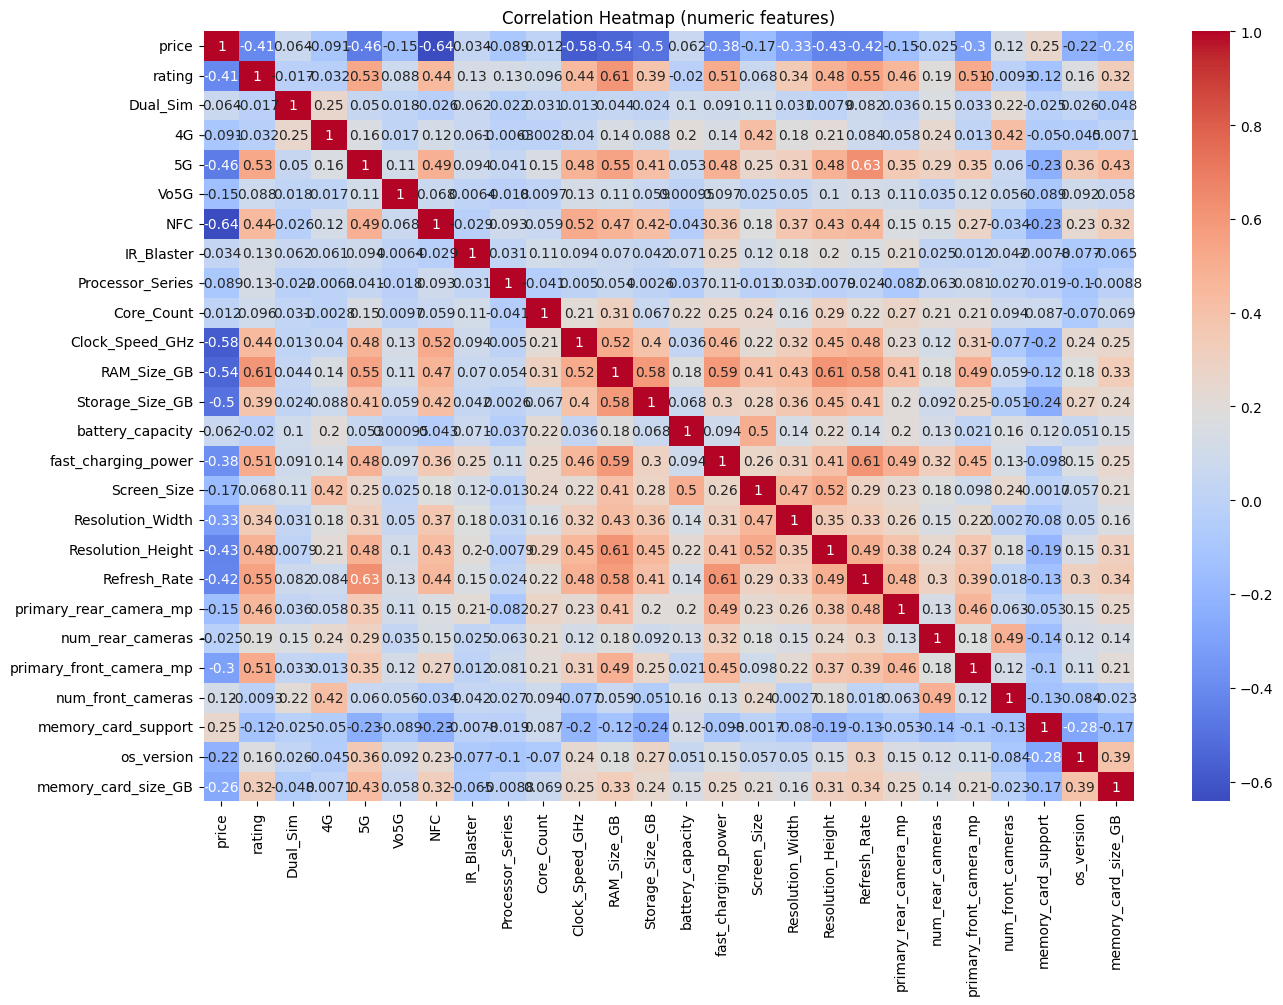

In [81]:

plt.figure(figsize=(15,10))
numeric_corr = df.select_dtypes(include='number').corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (numeric features)')
plt.show()
    

In [82]:
outliers_col=['rating','Processor_Series','Core_Count','Clock_Speed_GHz',
              'RAM_Size_GB','Storage_Size_GB','battery_capacity','fast_charging_power',
              'Screen_Size','Resolution_Width','Resolution_Height','Refresh_Rate',
              'primary_rear_camera_mp','primary_front_camera_mp','num_front_cameras','memory_card_size_GB']
outliers_col_clean = [col.strip() for col in outliers_col]
for c in outliers_col_clean:
    df[f"log_{c}"] = np.log1p(df[c])

In [83]:
df['performance_score'] = df['log_Core_Count'] * df['log_Clock_Speed_GHz'] * (df['log_RAM_Size_GB'] / 4)
df['camera_quality_score'] = (df['log_primary_rear_camera_mp'] * 0.7 + df['log_primary_front_camera_mp'] * 0.3)

In [84]:
df.drop(columns=outliers_col_clean, inplace=True)

In [85]:
colms=['Processor_Brand','Performance_Tier','RAM_Tier','Notch_Type','os_name','brand']
for c in colms:
    print(f"{c}: {df[c].unique()}")
   

Processor_Brand: ['Snapdragon' 'Helio' 'Dimensity' 'Other' 'Bionic' 'Exynos'
 'Google Tensor' 'Unisoc' 'Kirin']
Performance_Tier: ['Flagship' 'Unknown' 'Mid-Range' 'High-End' 'Budget']
RAM_Tier: ['Flagship' 'High-End' 'Mid-Range' 'Budget']
Notch_Type: ['Punch Hole' 'Water Drop Notch' 'No Notch' 'Dual Punch Hole'
 'Large Notch' 'Small Notch']
os_name: ['Android' 'iOS' 'HarmonyOS' 'EMUI' 'Pragati OS' 'KAI OS' 'RTOS']
brand: ['iQOO' 'Samsung' 'Poco' 'Vivo' 'POCO' 'Realme' 'Motorola' 'Tecno' 'Asus'
 'Oppo' 'Google' 'Infinix' 'OnePlus' 'Apple' 'Xiaomi' 'Gionee' 'OPPO'
 'Huawei' 'Honor' 'TCL' 'Nokia' 'Zanco' 'CAT' 'itel' 'Sony' 'Nubia'
 'Realme Narzo' 'Tesla' 'BlackZone' 'DIZO' 'Lyf' 'Nothing' 'Lenovo'
 'Oukitel' 'Letv' 'Itel' 'Motorola Edge' 'Jio' 'LG' 'ZTE' 'Lava' 'Vertu'
 'iKall' 'Eunity' 'Redmi' 'Royole' 'Sharp' 'Micromax' 'Namotel' 'Doogee'
 'Cola' 'XTouch' 'LeEco' 'Duoqin' 'BLU']


In [86]:
replace_dict = { "Poco": "POCO", "Oppo": "OPPO", "itel": "Itel", "Motorola Edge": "Motorola",}
df['brand'] = df['brand'].replace(replace_dict)

In [87]:
df['brand'].value_counts()

brand
Samsung         124
Xiaomi          106
Vivo             95
OPPO             71
Realme           70
Motorola         43
OnePlus          38
Apple            37
POCO             33
iQOO             28
Tecno            28
Infinix          25
Nokia            25
Realme Narzo     16
Huawei           15
Google           12
Honor            10
Itel              9
Sony              8
Nothing           5
Nubia             5
Asus              5
LG                4
Jio               4
Lava              4
iKall             3
Gionee            3
Letv              3
Redmi             3
Doogee            2
Lyf               2
ZTE               2
Lenovo            2
Oukitel           2
Eunity            2
Micromax          2
TCL               1
DIZO              1
BlackZone         1
Zanco             1
CAT               1
Tesla             1
Vertu             1
Sharp             1
Royole            1
Namotel           1
Cola              1
XTouch            1
LeEco             1
Duoqin        

In [88]:
min_frquency = 10
brand_counts = df['brand'].value_counts()
brands_to_replace = brand_counts[brand_counts < min_frquency].index
df['brand'] = df['brand'].replace(brands_to_replace, 'Other')

In [89]:
df['Processor_Brand'].value_counts()

Processor_Brand
Snapdragon       350
Helio            169
Dimensity        147
Other             84
Exynos            44
Bionic            34
Unisoc            24
Kirin              7
Google Tensor      2
Name: count, dtype: int64

In [90]:
count= df['Processor_Brand'].value_counts()
processor_brand_replace = count[count < min_frquency].index
df['Processor_Brand'] = df['Processor_Brand'].replace(processor_brand_replace, 'Other')

In [91]:
df['Notch_Type'].value_counts()


Notch_Type
Punch Hole          469
Water Drop Notch    269
No Notch             88
Small Notch          21
Large Notch           9
Dual Punch Hole       5
Name: count, dtype: int64

In [92]:
count_type=df['Notch_Type'].value_counts()
notch_type_replace = count_type[count_type < min_frquency].index
df['Notch_Type'] = df['Notch_Type'].replace(notch_type_replace, 'Other')

In [93]:
df['os_name'].value_counts()

os_name
Android       825
iOS            26
HarmonyOS       4
EMUI            2
RTOS            2
Pragati OS      1
KAI OS          1
Name: count, dtype: int64

In [94]:
count_os=df['os_name'].value_counts()
os_replace = count_os[count_os < min_frquency].index
df['os_name'] = df['os_name'].replace(os_replace, 'Other')

In [95]:
colms=['Processor_Brand','Performance_Tier','RAM_Tier','Notch_Type','os_name','brand']
for c in colms:
    print(f"{c}: {df[c].unique()}")
   

Processor_Brand: ['Snapdragon' 'Helio' 'Dimensity' 'Other' 'Bionic' 'Exynos' 'Unisoc']
Performance_Tier: ['Flagship' 'Unknown' 'Mid-Range' 'High-End' 'Budget']
RAM_Tier: ['Flagship' 'High-End' 'Mid-Range' 'Budget']
Notch_Type: ['Punch Hole' 'Water Drop Notch' 'No Notch' 'Other' 'Small Notch']
os_name: ['Android' 'iOS' 'Other']
brand: ['iQOO' 'Samsung' 'POCO' 'Vivo' 'Realme' 'Motorola' 'Tecno' 'Other' 'OPPO'
 'Google' 'Infinix' 'OnePlus' 'Apple' 'Xiaomi' 'Huawei' 'Honor' 'Nokia'
 'Realme Narzo']


In [96]:
one_hot_cols = ['Processor_Brand', 'Notch_Type', 'os_name']
ohn = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = ohn.fit_transform(df[one_hot_cols])
encoded_col_names = ohn.get_feature_names_out(one_hot_cols)
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_df], axis=1)
df.drop(columns=one_hot_cols, inplace=True)

In [97]:
tiers_order = [
	['Unknown', 'Budget', 'Low-End', 'Mid-Range', 'High-End', 'Flagship'],
	['Unknown', 'Budget', 'Low-End', 'Mid-Range', 'High-End', 'Flagship']
]

oe = OrdinalEncoder(categories=tiers_order)
df[['Performance_Tier', 'RAM_Tier']] = oe.fit_transform(df[['Performance_Tier', 'RAM_Tier']])

In [98]:
te = TargetEncoder(cols=['brand'], min_samples_leaf=20, smoothing=10)
df['brand'] = te.fit_transform(df['brand'], df['price'])

In [99]:
df.head()

,price,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Performance_Tier,RAM_Tier,num_rear_cameras,memory_card_support,os_version,brand,log_rating,log_Processor_Series,log_Core_Count,log_Clock_Speed_GHz,log_RAM_Size_GB,log_Storage_Size_GB,log_battery_capacity,log_fast_charging_power,log_Screen_Size,log_Resolution_Width,log_Resolution_Height,log_Refresh_Rate,log_primary_rear_camera_mp,log_primary_front_camera_mp,log_num_front_cameras,log_memory_card_size_GB,performance_score,camera_quality_score,Processor_Brand_Dimensity,Processor_Brand_Exynos,Processor_Brand_Helio,Processor_Brand_Other,Processor_Brand_Snapdragon,Processor_Brand_Unisoc,Notch_Type_Other,Notch_Type_Punch Hole,Notch_Type_Small Notch,Notch_Type_Water Drop Notch,os_name_Other,os_name_iOS
0,0,1,1,1,0,1,0,5.0,5.0,3.0,1,12.0,0.641800,4.454347,6.769642,2.197225,1.435085,2.564949,5.549076,8.389587,4.204693,2.030776,6.985642,7.783641,4.795791,3.891820,2.833213,0.693147,6.908755,2.021951,3.574238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1,1,0,1,0,5.0,4.0,3.0,1,10.0,0.629035,4.488636,6.763885,2.197225,1.345472,2.197225,4.859812,8.412055,0.000000,2.014903,6.985642,7.783641,4.795791,2.564949,3.496508,0.693147,6.908755,1.623916,2.844417,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,1,1,1,0,0,0,0.0,3.0,2.0,1,12.0,0.641800,4.330733,1.609438,2.197225,1.223775,1.609438,4.174387,8.517393,2.944439,2.025513,6.985642,7.786967,4.795791,3.931826,2.197225,0.693147,6.908755,1.081908,3.411445,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,1,0,0,0,1,3.0,3.0,3.0,1,12.0,0.868365,4.317488,4.605170,2.197225,1.163151,1.609438,4.174387,8.517393,2.944439,2.025513,6.985642,7.783641,4.510860,3.931826,2.197225,0.693147,6.240276,1.028312,3.411445,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,1,0,0,0,0,3.0,4.0,3.0,1,12.0,0.768394,4.394449,6.523562,2.197225,1.223775,2.197225,4.859812,8.517393,3.806662,2.025513,6.985642,7.786967,4.510860,3.931826,2.833213,0.693147,6.908755,1.477034,3.602242,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


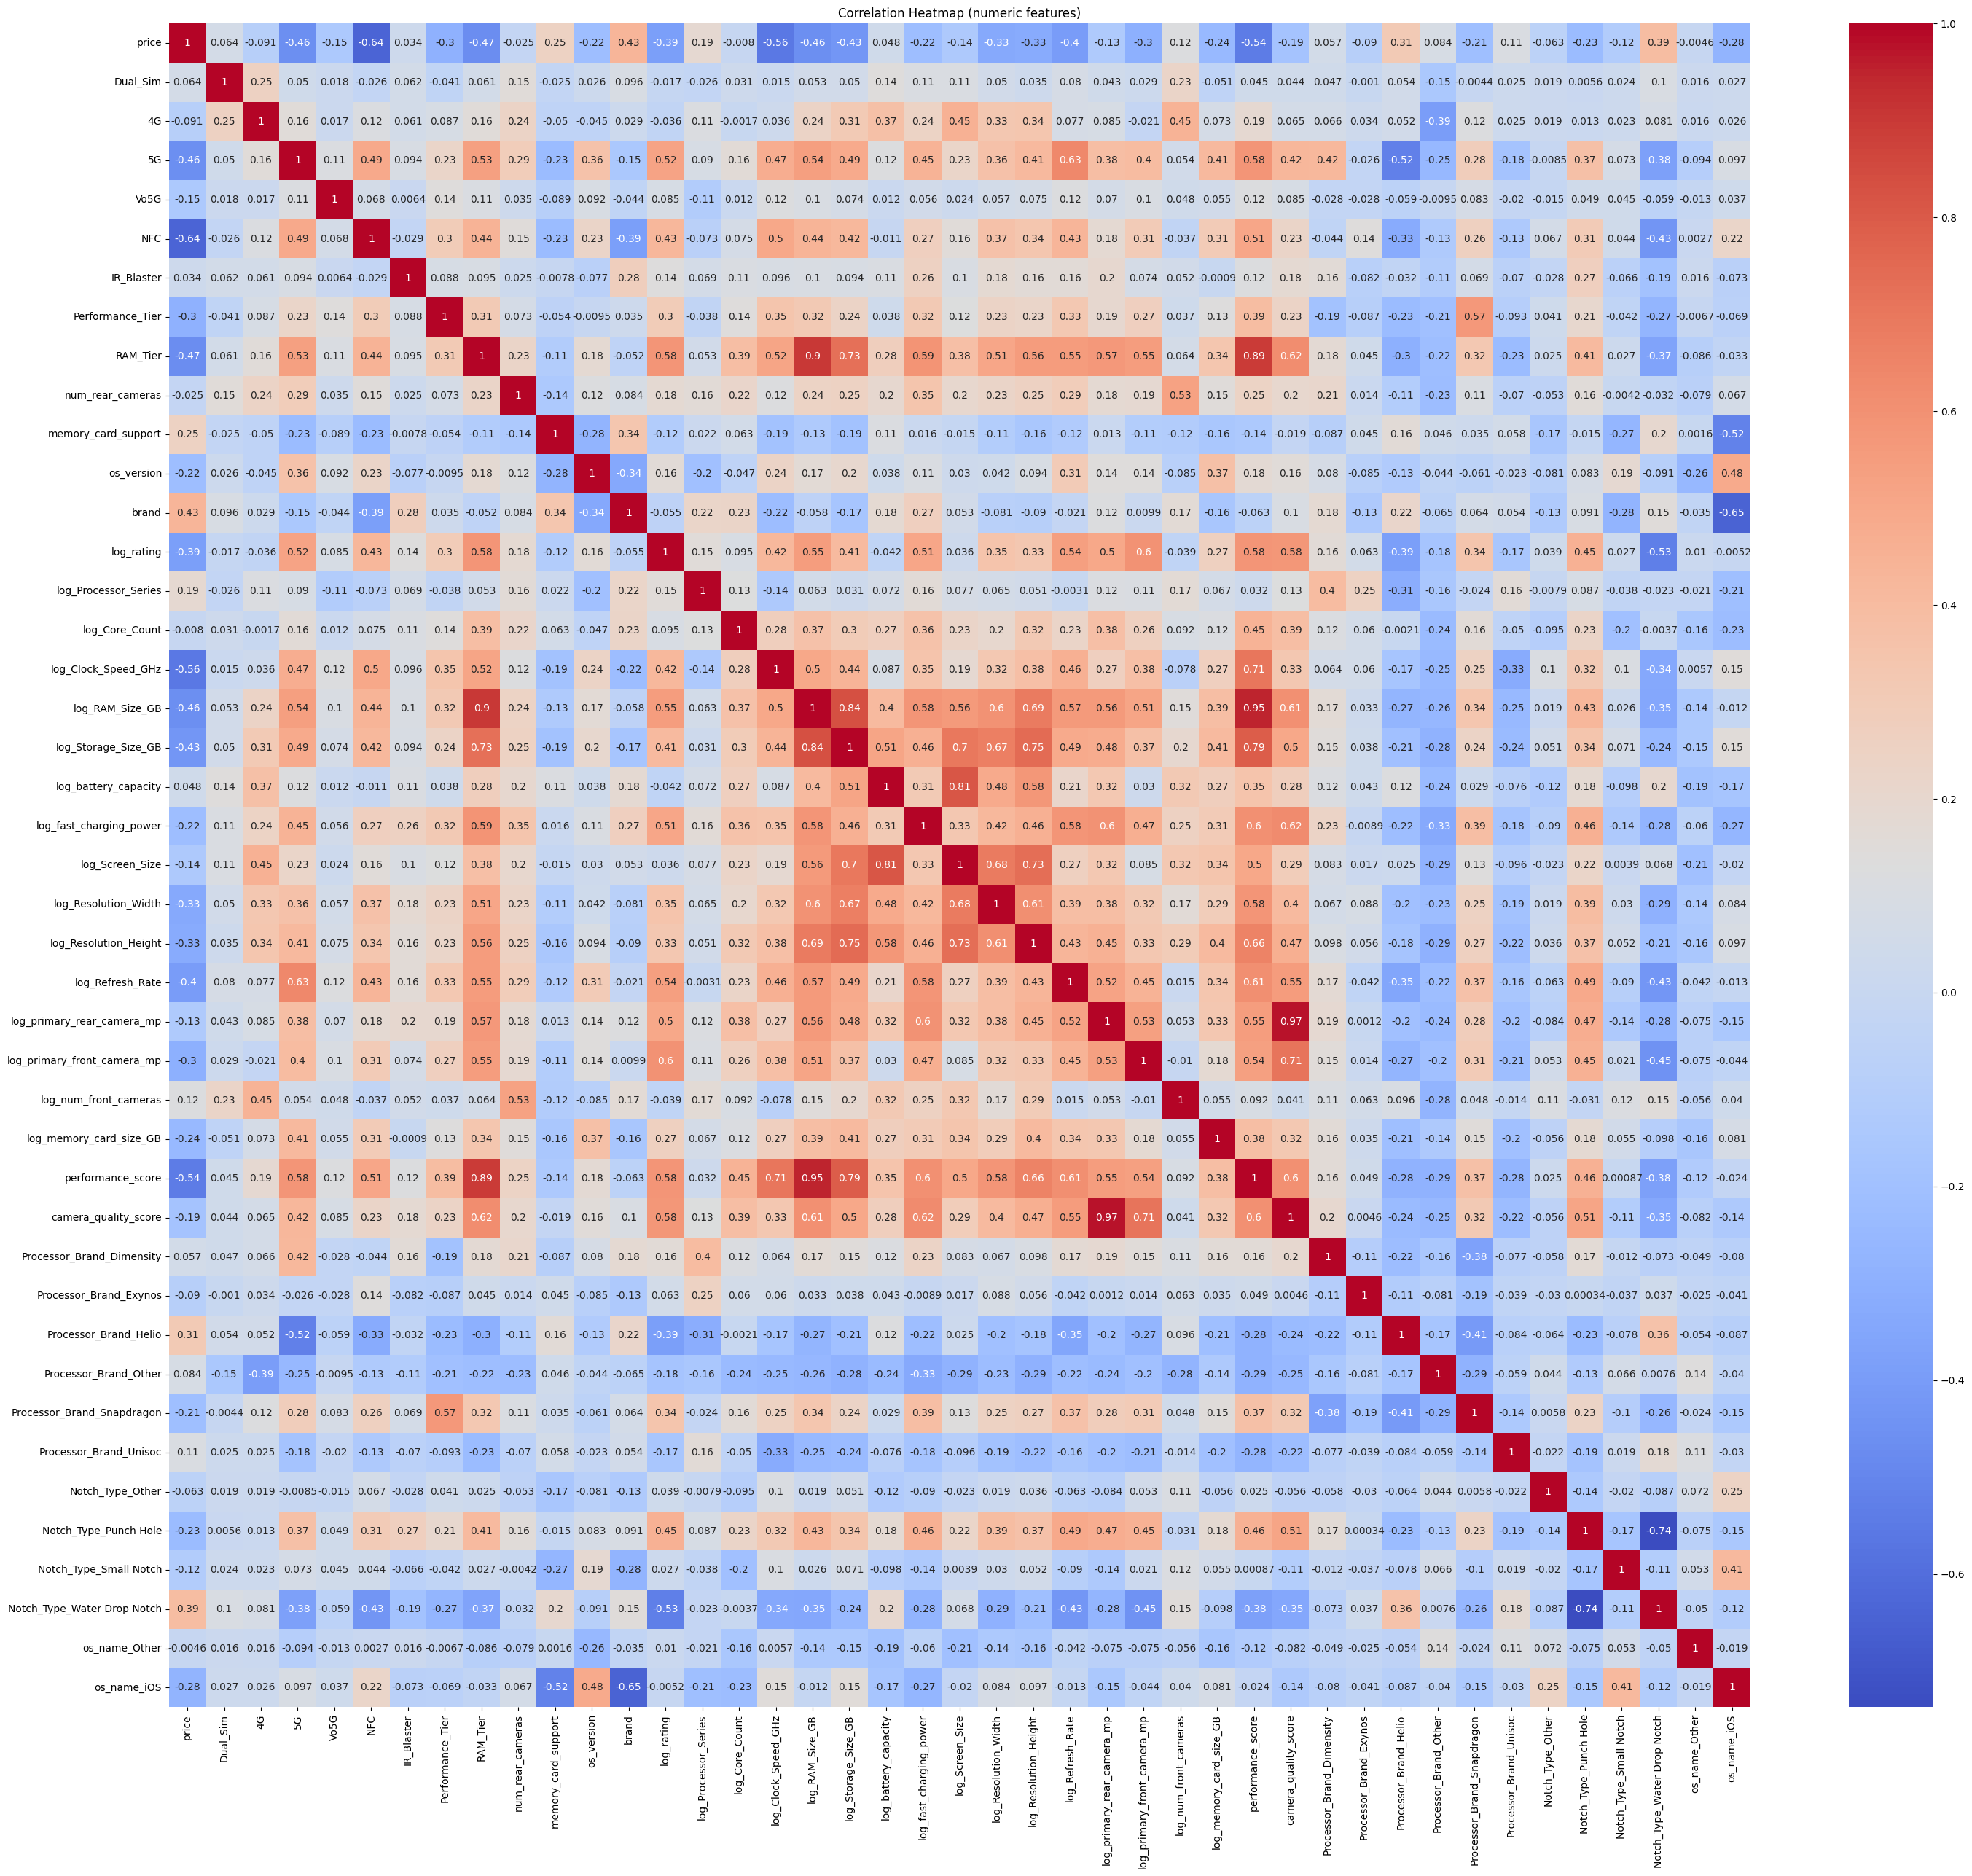

In [100]:
plt.figure(figsize=(35,30))
numeric_corr = df.select_dtypes(include='number').corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (numeric features)')
plt.show()

log_Processor_Series           0.393819
performance_score              0.321023
log_Clock_Speed_GHz            0.262131
log_Resolution_Height          0.226386
log_Resolution_Width           0.191124
camera_quality_score           0.190603
log_primary_front_camera_mp    0.183158
NFC                            0.180918
RAM_Tier                       0.179042
log_RAM_Size_GB                0.155705
log_fast_charging_power        0.147643
log_Refresh_Rate               0.147330
log_rating                     0.140400
log_Storage_Size_GB            0.134236
log_Screen_Size                0.126439
Performance_Tier               0.107410
5G                             0.103705
log_battery_capacity           0.092856
brand                          0.079048
Processor_Brand_Helio          0.070535
dtype: float64


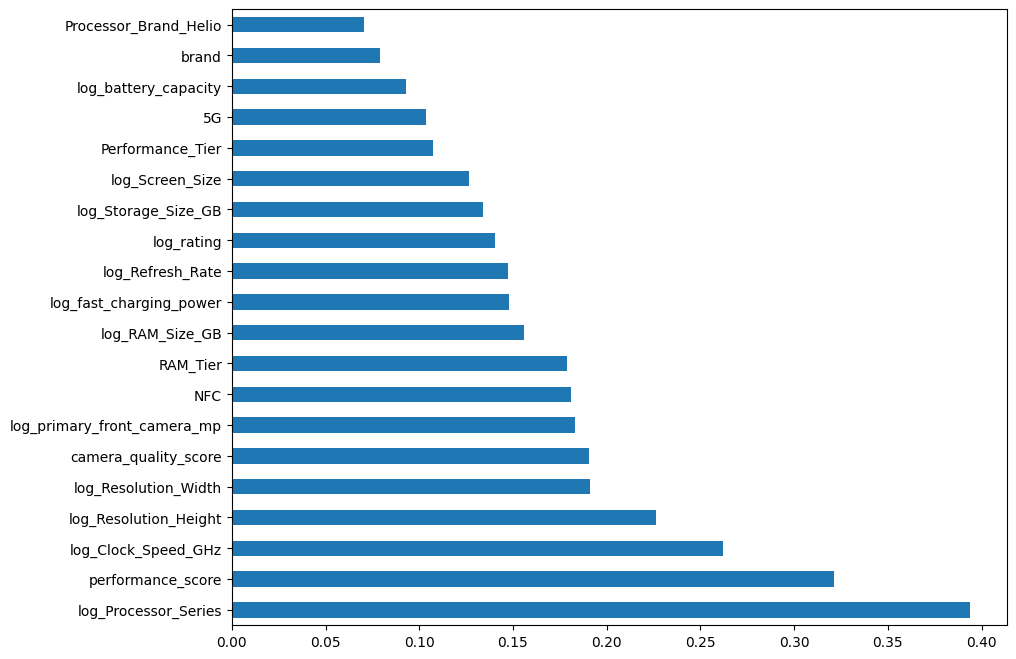

In [118]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)
print(mi_series.head(20))

plt.figure(figsize=(10,8))
mi_series.head(20).plot(kind='barh')
plt.show()


# Modeling

### Models -> 2 

In [101]:
# Models code

### Models -> 2 

In [102]:
# Models code

### Models -> 1

In [103]:
# Model code